In [1]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
from sklearn.model_selection import train_test_split
import warnings
import requests
warnings.filterwarnings("ignore")

In [2]:
# importing and reading the csv raw data
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv', index_col=False)
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.head(30) 

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


* We see that we have both categorical and numeric columns

In [5]:
data.shape

(32560, 15)

* we can see that shape of the dataset is 32560 rows and 15 columns 


In [6]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

* From above we see the column names present in dataset

In [7]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

* There are no null values in the dataset

In [8]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


* The age column has a range of 17 to 90.
- The Fnlwgt column has a min value=1.228500e and maximum value=1.484705e
- The Education_num has a range 1 to 16
- The Capital_gain starts from 0 to 99999
- The Capital_loss starts at 0 to 4356
- The Hours_per_week range between 1 to 99.


In [9]:
data['Income'].value_counts

<bound method IndexOpsMixin.value_counts of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: object>

<AxesSubplot:xlabel='Age', ylabel='Density'>

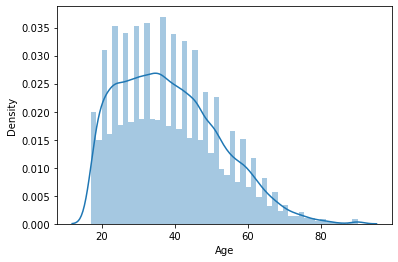

In [10]:
sns.distplot(data.Age)
# sns.histplot(data.Age)

* We can see that our data is right skewed, falling in the 20–50. The count keeps on decreasing as the age increases.


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

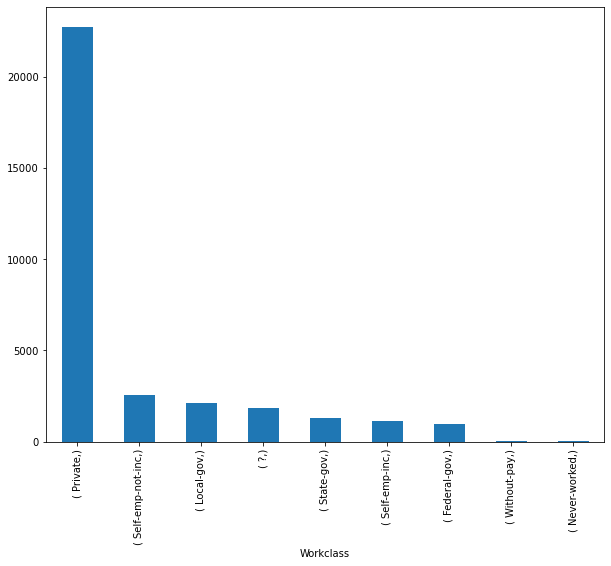

In [11]:
plt.figure(figsize=(10,8)) 
data[['Workclass']].value_counts().plot(kind="bar")
data['Workclass'].value_counts()

* We see that many people belong to 'Private' workclass with value 22696
* We can also see that parameter '?' has 1836 values which implies that there are missing values

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

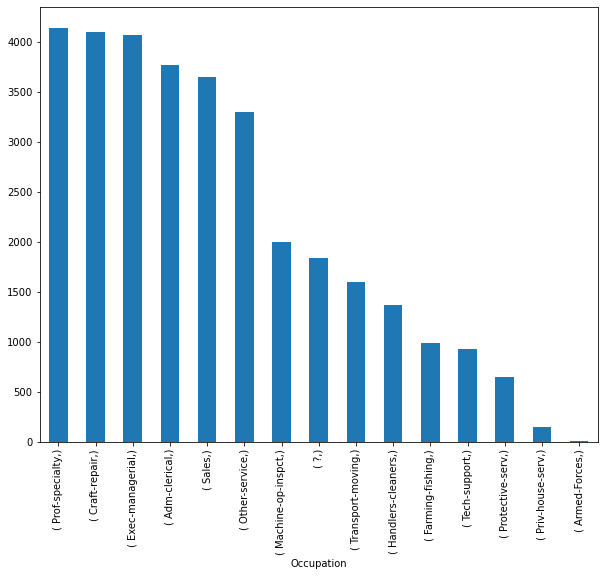

In [12]:
plt.figure(figsize=(10,8)) 
data[['Occupation']].value_counts().plot(kind="bar")
data['Occupation'].value_counts()

* We see that many people belong to 'Prof-specialty' Occupation with value 4140
* We can also see that parameter '?' has 1843 values which implies that there are missing values

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

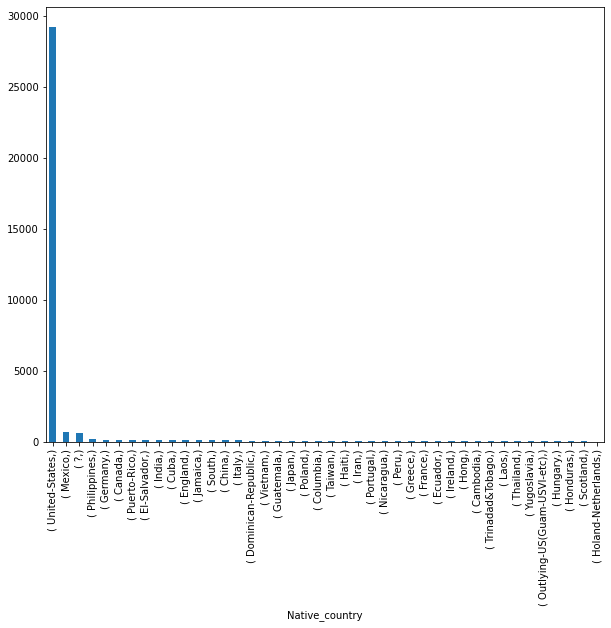

In [13]:
plt.figure(figsize=(10,8)) 
data[['Native_country']].value_counts().plot(kind="bar")
data['Native_country'].value_counts()

* We see that many people belong to ' United-States' Native_country with value 29169
* We can also see that parameter '?' has 583 values which implies that there are missing values

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

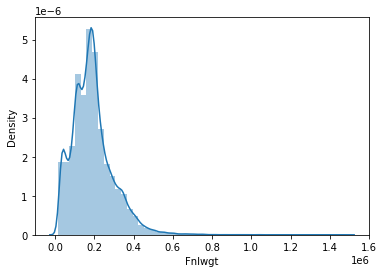

In [14]:

sns.distplot(data.Fnlwgt)

* We can see that our data is right skewed, falling in the range 0 to 0.2  The count keeps on decreasing as the Weightincreases.


<AxesSubplot:xlabel='Education_num', ylabel='Density'>

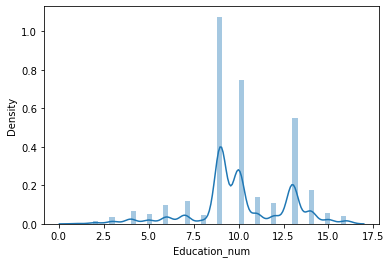

In [15]:
sns.distplot(data.Education_num)

* The Hours_per_week column has values scattered over a range of 1–16. The column does not have any missing values. Highest values have data near 9 and high peak can be observed.


In [16]:
data['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

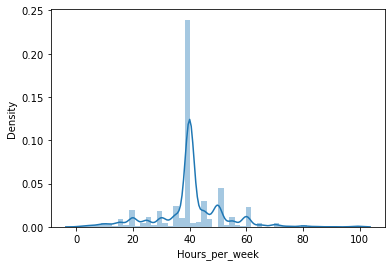

In [17]:
sns.distplot(data.Hours_per_week)

* The Hours_per_week column has values scattered over a range of 1–99. The column does not have any missing values. Highest values have data near 40 and high peak can be observed.


In [18]:
data['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

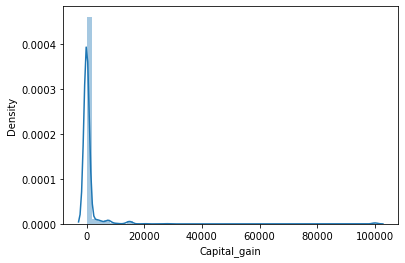

In [19]:
 
sns.distplot(data.Capital_gain)
data['Capital_gain'].value_counts()

* This is a numeric column which is right skewed, where high number of values are scattered at value 0  The count keeps on decreasing as the Capital_gain increases. Also there are outliers 


0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

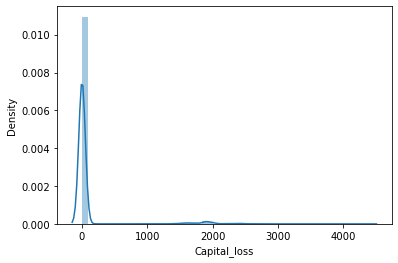

In [20]:
sns.distplot(data.Capital_loss)
data['Capital_loss'].value_counts()

* This is a numeric column which is right skewed, where high number of values are scattered at value 0  The count keeps on decreasing as the Capital_loss increases. Also there are outliers 


 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

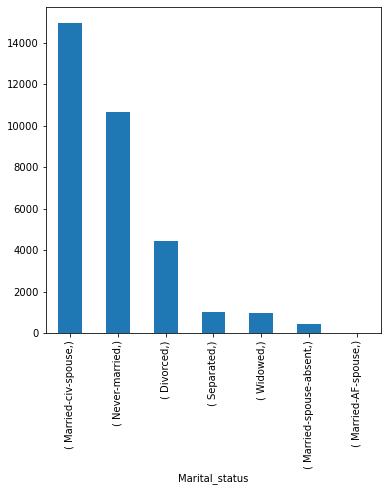

In [21]:
plt.figure(figsize=(6,6)) 
data[['Marital_status']].value_counts().plot(kind="bar")
data['Marital_status'].value_counts()

* We see that many people are ' Married-civ-spouse' with value 14976
* there are no missing values

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

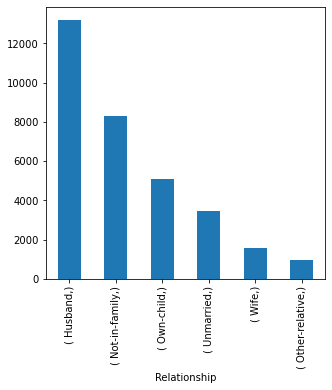

In [22]:
plt.figure(figsize=(5,5)) 
data[['Relationship']].value_counts().plot(kind="bar")
data['Relationship'].value_counts()

* We see that' Husband' relationship has the highest with value 13193
* there are no missing values

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

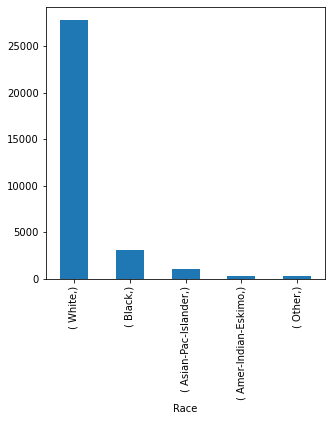

In [23]:
plt.figure(figsize=(5,5)) 
data[['Race']].value_counts().plot(kind="bar")
data['Race'].value_counts()

* We see that' White' column count has significant highest with value of 27815
* there are no missing values

 Male      21789
 Female    10771
Name: Sex, dtype: int64

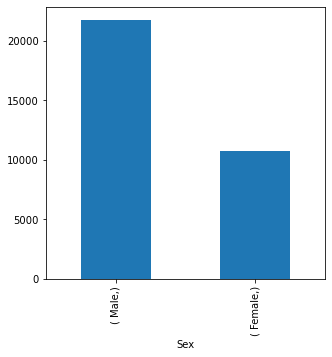

In [24]:
plt.figure(figsize=(5,5)) 
data[['Sex']].value_counts().plot(kind="bar")
data['Sex'].value_counts()

* We see that' Male' column has highest count with value of 21789 which is double of Female count 
* there are no missing values

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

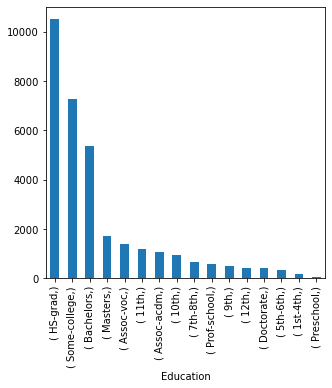

In [25]:
plt.figure(figsize=(5,5)) 
data[['Education']].value_counts().plot(kind="bar")
data['Education'].value_counts()

* We see that' HS-grad' column has highest count with value of 10501.
* there are no missing values

#### Bivariate Analysis


<AxesSubplot:xlabel='Income', ylabel='count'>

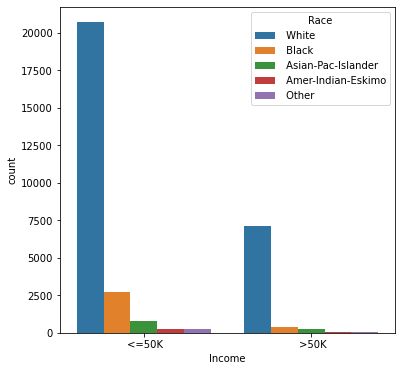

In [26]:
plt.figure(figsize=[6,6])
sns.countplot('Income',hue='Race',data=data) 

* We can see that 'White' race earning are the hightest for both <=50K and >50k

<AxesSubplot:xlabel='Income', ylabel='count'>

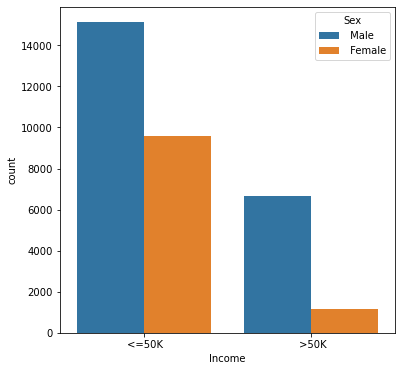

In [27]:
plt.figure(figsize=[6,6])
sns.countplot('Income',hue='Sex',data=data) 

* We can see that 'Male' sex earnings has hightest for both <=50K and >50k earning


<AxesSubplot:xlabel='Relationship', ylabel='count'>

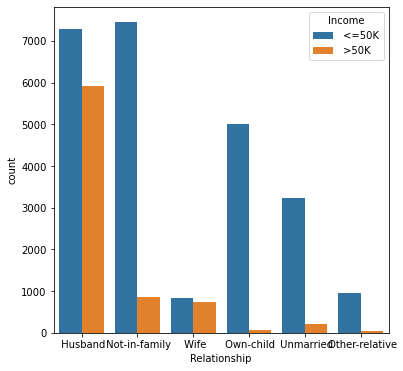

In [28]:
plt.figure(figsize=[6,6])
sns.countplot('Relationship',hue='Income',data=data) 

* From the plot we can observe that Husband and wife earns more than 50K(>50K)

<AxesSubplot:xlabel='Education', ylabel='count'>

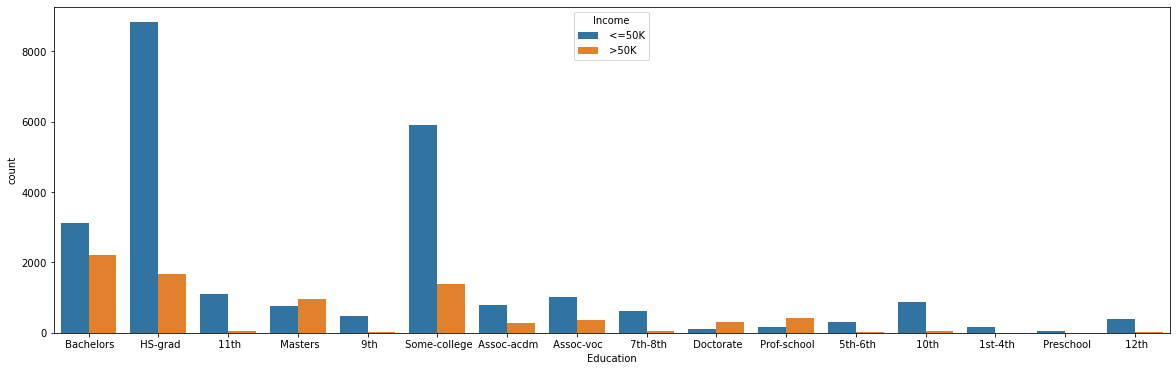

In [29]:
plt.figure(figsize=[20,6])
sns.countplot('Education',hue='Income',data=data) 

* Education level 'Masters, Doctorate, Prof-school' has High ratios of >50K earning

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

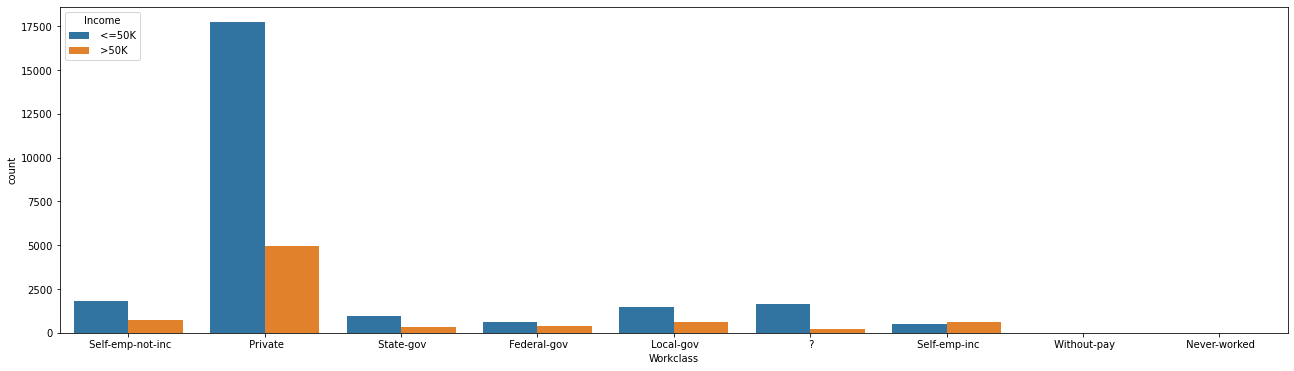

In [30]:
plt.figure(figsize=[22,6])
sns.countplot('Workclass',hue='Income',data=data) 
data['Workclass'].value_counts()

* Self-emp-inc is the only  which earns >50K 

#### Correlation

<AxesSubplot:>

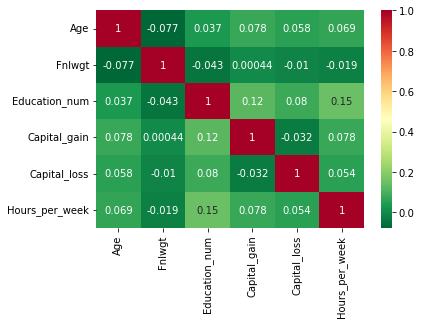

In [31]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn_r')

In [32]:
data.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


* Education_num is highly correlated with Hours_per_week

#### Data modeling
#### Replacing missing values

In [33]:
data.loc[data.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [34]:
data.loc[data.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [35]:
data.drop(data[data['Native_country'] == ' ?'].index,inplace=True)
# droping the bull values from both the columns
data.drop(data[data['Occupation'] == ' ?'].index,inplace=True)

In [36]:
data['Native_country'].unique()

data.drop(data[data['Occupation'] == ' ?'].index,inplace=True)  # removeing the unnamed values


In [37]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [38]:
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [39]:
data.head(30)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


* We can see that values where "?" has been removed from the data set

In [40]:
from sklearn.preprocessing import LabelEncoder
lable_encode = LabelEncoder() # label encoder 
data['Income']=lable_encode.fit_transform(data['Income'])
data['Sex']=lable_encode.fit_transform(data['Sex'])


* From label encoder we encoded "Sex" and "Income" columns
* 1: Male, 0:Female ; 0:<=50K , 1:>50K

In [41]:
#Converting 2 columns into binary 
data = pd.get_dummies(data,drop_first=True)
pd.set_option('display.max_columns',100)#to display all columns

In [42]:
data.head(10)

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,49,160187,5,0,0,0,16,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,52,209642,9,1,0,0,45,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,31,45781,14,0,14084,0,50,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,42,159449,13,1,5178,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [43]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_col = data[['Age','Fnlwgt','Education_num','Hours_per_week']]
# train_scaler_col = scaler.fit_transform(train_col)
# train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col.columns)


In [44]:
# data['Age']= train_scaler_col['Age']
# data['Fnlwgt']= train_scaler_col['Fnlwgt']
# data['Education_num']= train_scaler_col['Education_num']
# data['Hours_per_week']= train_scaler_col['Hours_per_week']

In [45]:
# data['Age']

In [46]:
# data.head()

#### Model Building

In [47]:
X = data.drop(['Income'],axis=1)
Y = data['Income']

In [48]:
print(X)

       Age  Fnlwgt  Education_num  Sex  Capital_gain  Capital_loss  \
0       50   83311             13    1             0             0   
1       38  215646              9    1             0             0   
2       53  234721              7    1             0             0   
3       28  338409             13    0             0             0   
4       37  284582             14    0             0             0   
...    ...     ...            ...  ...           ...           ...   
32555   27  257302             12    0             0             0   
32556   40  154374              9    1             0             0   
32557   58  151910              9    0             0             0   
32558   22  201490              9    1             0             0   
32559   52  287927              9    0         15024             0   

       Hours_per_week  Workclass_ Local-gov  Workclass_ Private  \
0                  13                     0                   0   
1                  40    

In [49]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 30161, dtype: int32


##### Spliting the data into Train and Test

In [50]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, test_size=0.20, random_state=15)

In [51]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(24128, 96)
(24128,)
(6033, 96)
(6033,)


In [52]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

##### Logistic Regression
##### Model Training

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [54]:
X_train_prediction = model.predict(X_train)

In [55]:
print(X_train_prediction)

[1 0 0 ... 0 0 0]


In [56]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)


Accuracy score of training data :  0.7887931034482759


In [57]:
X_test_prediction = model.predict(X_test)

In [58]:
print(X_test_prediction)

[0 0 0 ... 0 0 0]


In [59]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', test_data_accuracy)

Accuracy score of testing data :  0.7974473727830267


#### Confusion Matrix LogisticRegression

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction))
print("Confusion matrix for logistic regression model")
print(confusion_matrix)



Confusion matrix for logistic regression model
       0     1
0  17413   666
1   4430  1619


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction))
print("Confusion matrix for logistic regression model")
print(confusion_matrix)


Confusion matrix for logistic regression model
      0    1
0  4413  161
1  1061  398


#### DecisionTreeClassifier

In [62]:

model1 = DecisionTreeClassifier()
model1.fit(X_train,Y_train)
X_train_prediction1 = model1.predict(X_train)
X_test_prediction1 = model1.predict(X_test)
print(X_train_prediction1)
print(X_test_prediction1)

[1 0 1 ... 0 0 0]
[0 0 0 ... 0 1 0]


In [63]:
from sklearn.metrics import accuracy_score
training_data_accuracy1 = accuracy_score(Y_train, X_train_prediction1)
print('Accuracy score of training data : ', training_data_accuracy1)

test_data_accuracy1 = accuracy_score(Y_test, X_test_prediction1)
print('Accuracy score of testing data : ', test_data_accuracy1)

Accuracy score of training data :  1.0
Accuracy score of testing data :  0.8107077739101608


##### Confusion Matrix DecisionTreeClassifier

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction1))
print("Confusion matrix for DecisionTreeClassifier model")
print(confusion_matrix)

Confusion matrix for DecisionTreeClassifier model
       0     1
0  18079     0
1      0  6049


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction))
print("Confusion matrix for DecisionTreeClassifier model")
print(confusion_matrix)

Confusion matrix for DecisionTreeClassifier model
      0    1
0  4413  161
1  1061  398


##### RandomForestClassifier


In [66]:
model2 = RandomForestClassifier()
model2.fit(X_train,Y_train)

X_train_prediction2 = model2.predict(X_train)
X_test_prediction2 = model2.predict(X_test)
print(X_train_prediction2)
print(X_test_prediction2)


[1 0 1 ... 0 0 0]
[0 0 0 ... 0 1 0]


In [67]:
from sklearn.metrics import accuracy_score
training_data_accuracy2 = accuracy_score(Y_train, X_train_prediction2)
print('Accuracy score of training data : ', training_data_accuracy2)

test_data_accuracy2 = accuracy_score(Y_test, X_test_prediction2)
print('Accuracy score of testing data : ', test_data_accuracy2)

Accuracy score of training data :  0.9999171087533156
Accuracy score of testing data :  0.8559588927565058


##### Confusion Matrix RandomForestClassifier

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction2))
print("Confusion matrix for RandomForestClassifier model")
print(confusion_matrix)

Confusion matrix for RandomForestClassifier model
       0     1
0  18079     0
1      2  6047


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction2))
print("Confusion matrix for RandomForestClassifier model")
print(confusion_matrix)

Confusion matrix for RandomForestClassifier model
      0    1
0  4259  315
1   554  905


#### SVC Classifier

In [70]:
model3 = SVC()
model3.fit(X_train,Y_train)

X_train_prediction3 = model3.predict(X_train)
X_test_prediction3 = model3.predict(X_test)
print(X_train_prediction3)
print(X_test_prediction3)

[1 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [71]:
from sklearn.metrics import accuracy_score
training_data_accuracy3 = accuracy_score(Y_train, X_train_prediction3)
print('Accuracy score of training data : ', training_data_accuracy3)

test_data_accuracy3 = accuracy_score(Y_test, X_test_prediction3)
print('Accuracy score of testing data : ', test_data_accuracy3)

Accuracy score of training data :  0.7859333554376657
Accuracy score of testing data :  0.7944637825294215


#### Confusion Matrix SVC Classifier

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction3))
print("Confusion matrix for SVC model")
print(confusion_matrix)

Confusion matrix for SVC model
       0    1
0  18062   17
1   5148  901


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction3))
print("Confusion matrix for SVC model")
print(confusion_matrix)

Confusion matrix for SVC model
      0    1
0  4567    7
1  1233  226


#### GradientBoostingClassifier

In [74]:
model4 = GradientBoostingClassifier()
model4.fit(X_train,Y_train)

X_train_prediction4 = model4.predict(X_train)
X_test_prediction4 = model1.predict(X_test)
print(X_train_prediction4)
print(X_test_prediction4)

[1 0 0 ... 1 0 1]
[0 0 0 ... 0 1 0]


In [75]:
from sklearn.metrics import accuracy_score
training_data_accuracy4 = accuracy_score(Y_train, X_train_prediction4)
print('Accuracy score of training data : ', training_data_accuracy4)

test_data_accuracy4 = accuracy_score(Y_test, X_test_prediction4)
print('Accuracy score of testing data : ', test_data_accuracy4)

Accuracy score of training data :  0.8670009946949602
Accuracy score of testing data :  0.8107077739101608


#### Confusion Matrix GradientBoosting Classifier

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction4))
print("Confusion matrix for SVC model")
print(confusion_matrix)

Confusion matrix for SVC model
       0     1
0  17176   903
1   2306  3743


In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction4))
print("Confusion matrix for SVC model")
print(confusion_matrix)

Confusion matrix for SVC model
      0    1
0  3978  596
1   546  913


#### XGBClassifier

In [78]:
model5 = XGBClassifier()
model5.fit(X_train,Y_train)

X_train_prediction5 = model5.predict(X_train)
X_test_prediction5 = model5.predict(X_test)
print(X_train_prediction5)
print(X_test_prediction5)

[17:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 0 1 ... 1 0 0]
[0 0 0 ... 1 1 0]


In [79]:
from sklearn.metrics import accuracy_score
training_data_accuracy5 = accuracy_score(Y_train, X_train_prediction5)
print('Accuracy score of training data : ', training_data_accuracy5)

test_data_accuracy5 = accuracy_score(Y_test, X_test_prediction5)
print('Accuracy score of testing data : ', test_data_accuracy5)

Accuracy score of training data :  0.9047994031830239
Accuracy score of testing data :  0.8687220288413725


#### Confusion Matrix XGBClassifier

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction5))
print("Confusion matrix for SVC model")
print(confusion_matrix)

Confusion matrix for SVC model
       0     1
0  17328   751
1   1546  4503


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction5))
print("Confusion matrix for SVC model")
print(confusion_matrix)

Confusion matrix for SVC model
      0    1
0  4268  306
1   486  973


In [82]:
print(X_train_prediction)
print(X_test_prediction)

print(X_train_prediction1)
print(X_test_prediction1)


print(X_train_prediction2)
print(X_test_prediction2)

print(X_train_prediction3)
print(X_test_prediction3)

print(X_train_prediction4)
print(X_test_prediction4)

print(X_train_prediction5)
print(X_test_prediction5)

[1 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 0 1 ... 0 0 0]
[0 0 0 ... 0 1 0]
[1 0 1 ... 0 0 0]
[0 0 0 ... 0 1 0]
[1 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 0 0 ... 1 0 1]
[0 0 0 ... 0 1 0]
[1 0 1 ... 1 0 0]
[0 0 0 ... 1 1 0]


In [83]:
print('Accuracy score of training data : ', training_data_accuracy)  #lr
print('Accuracy score of testing data : ', test_data_accuracy)
print("\n")
print('Accuracy score of training data : ', training_data_accuracy1)  #dt
print('Accuracy score of testing data : ', test_data_accuracy1)
print("\n")
print('Accuracy score of training data : ', training_data_accuracy2)   #rf
print('Accuracy score of testing data : ', test_data_accuracy2)
print("\n")
print('Accuracy score of training data : ', training_data_accuracy3)   #svc
print('Accuracy score of testing data : ', test_data_accuracy3)
print("\n")
print('Accuracy score of training data : ', training_data_accuracy4)   #gb
print('Accuracy score of testing data : ', test_data_accuracy4)
print("\n")
print('Accuracy score of training data : ', training_data_accuracy5)  #xgb
print('Accuracy score of testing data : ', test_data_accuracy5)

Accuracy score of training data :  0.7887931034482759
Accuracy score of testing data :  0.7974473727830267


Accuracy score of training data :  1.0
Accuracy score of testing data :  0.8107077739101608


Accuracy score of training data :  0.9999171087533156
Accuracy score of testing data :  0.8559588927565058


Accuracy score of training data :  0.7859333554376657
Accuracy score of testing data :  0.7944637825294215


Accuracy score of training data :  0.8670009946949602
Accuracy score of testing data :  0.8107077739101608


Accuracy score of training data :  0.9047994031830239
Accuracy score of testing data :  0.8687220288413725


In [84]:
lr_report = classification_report(Y_test,X_test_prediction)
print(" lr classification_report" ,'\n',lr_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      4574
           1       0.71      0.27      0.39      1459

    accuracy                           0.80      6033
   macro avg       0.76      0.62      0.64      6033
weighted avg       0.78      0.80      0.76      6033



In [85]:
dt_report = classification_report(Y_test,X_test_prediction1)
print(" lr classification_report" ,'\n',dt_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4574
           1       0.61      0.63      0.62      1459

    accuracy                           0.81      6033
   macro avg       0.74      0.75      0.74      6033
weighted avg       0.81      0.81      0.81      6033



In [86]:
rf_report = classification_report(Y_test,X_test_prediction2)
print(" lr classification_report" ,'\n',rf_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4574
           1       0.74      0.62      0.68      1459

    accuracy                           0.86      6033
   macro avg       0.81      0.78      0.79      6033
weighted avg       0.85      0.86      0.85      6033



In [87]:
svc_report = classification_report(Y_test,X_test_prediction3)
print(" lr classification_report" ,'\n',svc_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      4574
           1       0.97      0.15      0.27      1459

    accuracy                           0.79      6033
   macro avg       0.88      0.58      0.57      6033
weighted avg       0.83      0.79      0.73      6033



In [88]:
gb_report = classification_report(Y_test,X_test_prediction4)
print(" lr classification_report" ,'\n',gb_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4574
           1       0.61      0.63      0.62      1459

    accuracy                           0.81      6033
   macro avg       0.74      0.75      0.74      6033
weighted avg       0.81      0.81      0.81      6033



In [89]:
xgb_report = classification_report(Y_test,X_test_prediction5)
print(" lr classification_report" ,'\n',xgb_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      4574
           1       0.76      0.67      0.71      1459

    accuracy                           0.87      6033
   macro avg       0.83      0.80      0.81      6033
weighted avg       0.86      0.87      0.87      6033



#### AUC ROC Curve

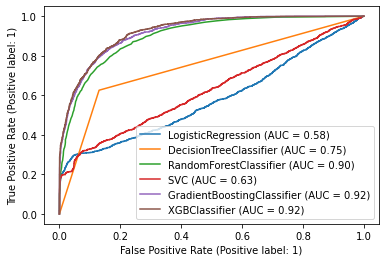

In [90]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(model,X_test,Y_test)
plot_roc_curve(model1,X_test,Y_test,ax=disp.ax_)
plot_roc_curve(model2,X_test,Y_test,ax=disp.ax_)
plot_roc_curve(model3,X_test,Y_test,ax=disp.ax_)
plot_roc_curve(model4,X_test,Y_test,ax=disp.ax_)
plot_roc_curve(model5,X_test,Y_test,ax=disp.ax_)

* From AUC ROC curve we can see our XGB classifier and Gradient Boosting classifier gives the best score.

In [91]:
# To create Dataframe of predicted value with particular respective index
result1 = pd.DataFrame()  #target data
result1['Prediction of Train data']=X_train_prediction5
result1

,Prediction of Train data
0,1
1,0
2,1
3,1
4,0
...,...
24123,0
24124,0
24125,1
24126,0


In [92]:
# To create Dataframe of predicted value with particular respective index
result2 = pd.DataFrame()  #target data
result2['Prediction of Test data']=X_test_prediction5
result2

,Prediction of Test data
0,0
1,0
2,0
3,0
4,0
...,...
6028,0
6029,0
6030,1
6031,1


In [93]:
data_r=pd.concat([result1,result2],ignore_index=True)

In [94]:
data_r

,Prediction of Train data,Prediction of Test data
0,1.0,NaN
1,0.0,NaN
2,1.0,NaN
3,1.0,NaN
4,0.0,NaN
...,...,...
30156,NaN,0.0
30157,NaN,0.0
30158,NaN,1.0
30159,NaN,1.0


In [95]:
data_r.to_csv("Census Income_case-study.csv")